In [7]:
import os
import numpy as np
from argparse import Namespace
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from data_manager import SinGanOne_Dataset
from functions import torch2np
from config import post_config
%matplotlib notebook

In [2]:
opt = Namespace()
opt.reals_dir = os.path.join(os.getcwd(), 'Input', 'Images')
opt.real_name = 'nature5.jpg'
opt.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
opt.plotting = False
opt.seed = 42
opt.top_res_dir = 'Output'
opt.top_models_dir = 'TrainedModels'
opt.min_size = 25
opt.max_size = 250
opt.batch_size = 3
opt.num_workers = 1
opt.scale_factor = 0.75
opt.ker_size = 3
opt.num_layer = 5
opt.niter = 10
opt.alpha = 10
opt.nfc = 32
opt.min_nfc = 32
opt.padd_size = 0
opt.netG = ''
opt.netD = ''
opt
opt = post_config(opt)
opt

Namespace(alpha=10, batch_size=3, device=device(type='cpu'), ker_size=3, max_size=250, min_nfc=32, min_nfc_init=32, min_size=25, model_dir='TrainedModels/nature5/scale_factor=0.75,alpha=10,min_size=25,max_size=250', netD='', netG='', nfc=32, nfc_init=32, niter=10, num_layer=5, num_workers=1, pad_image=5, pad_noise=5, padd_size=0, plotting=False, real_name='nature5.jpg', reals_dir='/home/manor/singan/SinGanOne/Input/Images', res_dir='Output/nature5', scale_factor=0.75, seed=42, top_models_dir='TrainedModels', top_res_dir='Output')

In [3]:
curr_scale = 0

In [4]:
ds = SinGanOne_Dataset(opt, curr_scale)

In [5]:
dl = DataLoader(ds,opt.batch_size, shuffle=False, num_workers=opt.num_workers)

<IPython.core.display.Javascript object>


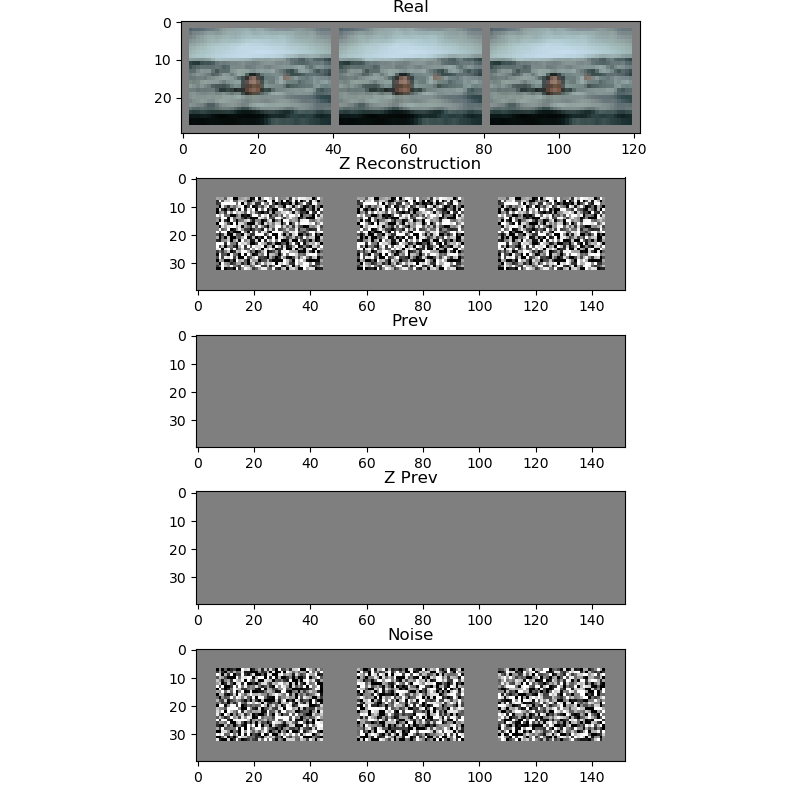

Minibatch: 0/10
----------------------------------------------------------------------------------------------------
torch.Size([3, 3, 26, 38])
torch.Size([3, 3, 36, 48])


<IPython.core.display.Javascript object>


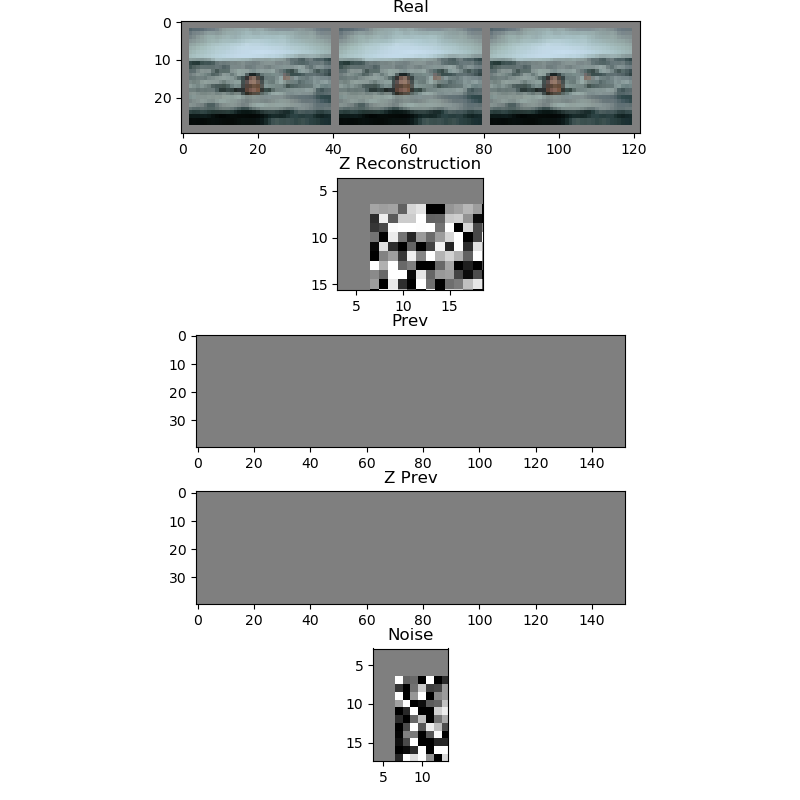

Minibatch: 1/10
----------------------------------------------------------------------------------------------------
torch.Size([3, 3, 26, 38])
torch.Size([3, 3, 36, 48])


<IPython.core.display.Javascript object>


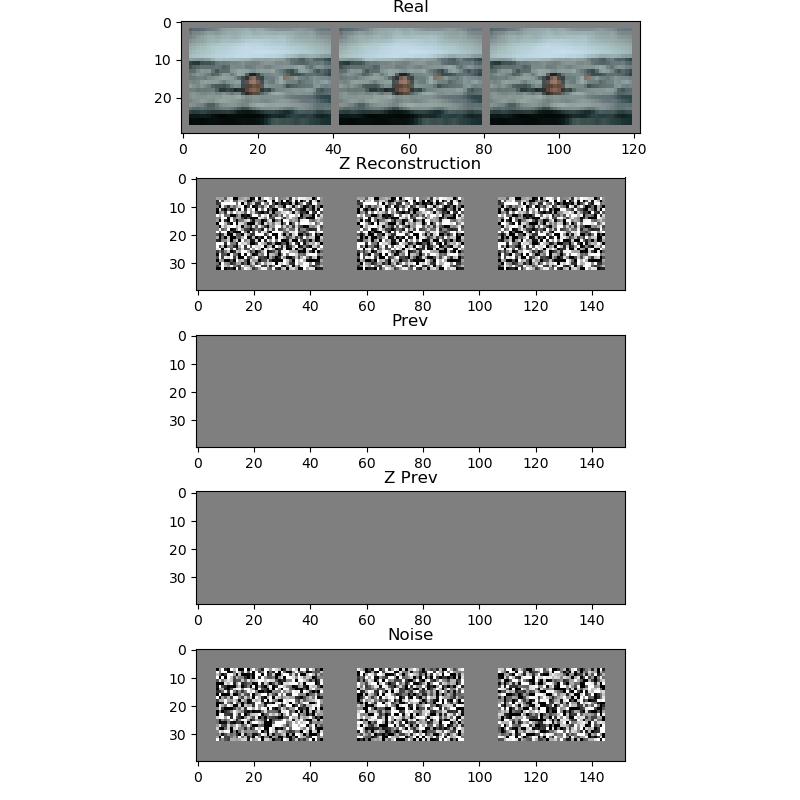

Minibatch: 2/10
----------------------------------------------------------------------------------------------------
torch.Size([3, 3, 26, 38])
torch.Size([3, 3, 36, 48])


<IPython.core.display.Javascript object>


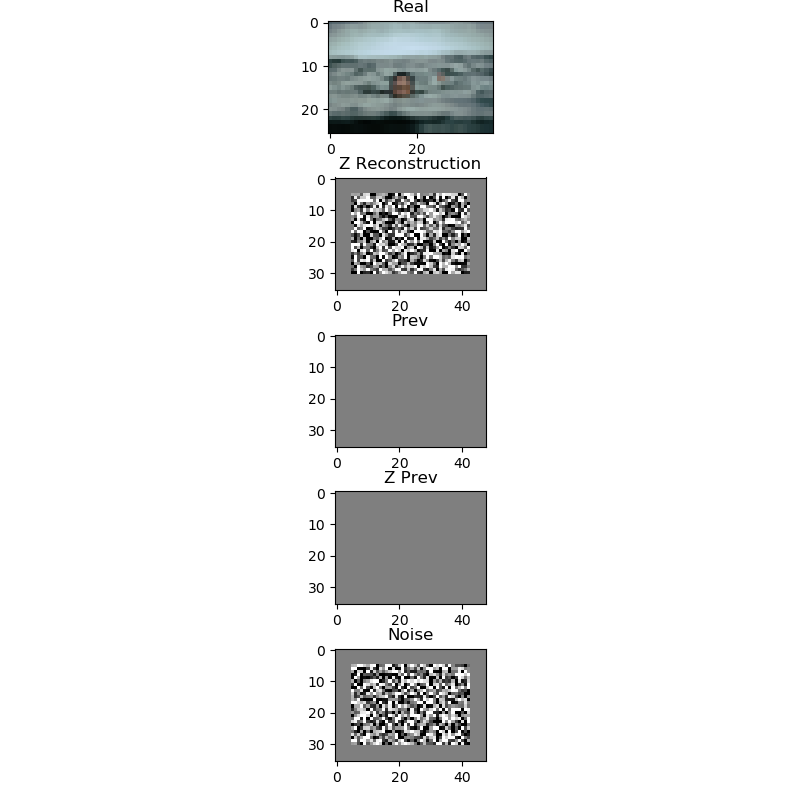

Minibatch: 3/10
----------------------------------------------------------------------------------------------------
torch.Size([1, 3, 26, 38])
torch.Size([1, 3, 36, 48])


In [8]:
for i, batch in enumerate(dl):    
    real    = batch[0]
    z_rec   = batch[1]
    prev    = batch[2]
    z_prev  = batch[3]
    noise   = batch[4]
    
    fig, axes = plt.subplots(5,1, figsize=(8,8))
    print(f'Minibatch: {i}/{len(ds)}')
    print(f'-'*100)
    fig.tight_layout()
    
    print(real.shape)
    print(z_rec.shape)
    axes[0].imshow(torch2np(make_grid(real)))
    axes[1].imshow(torch2np(make_grid(z_rec)))
    axes[2].imshow(torch2np(make_grid(prev)))
    axes[3].imshow(torch2np(make_grid(z_prev)))
    axes[4].imshow(torch2np(make_grid(noise)))
    
    axes[0].set_title(f'Real')
    axes[1].set_title(f'Z Reconstruction')
    axes[2].set_title(f'Prev')
    axes[3].set_title(f'Z Prev')
    axes[4].set_title(f'Noise')
    plt.show()